# COVID DATA_ANALYSIS_VISUALIZATION

__COVID-19's effect on the entire world is apparent as we are struggling to fight this deadly virus. The first COVID-19 case was reported on December 31, 2019 in Wuhan, China. On January 21, 2020, the CDC (Center for Disease Control) confirmed the first COVID-19 case in the U.S. ("A Timeline of Covid-19 Developments in 2020").__

__Since then, cases have risen exponentially and numerous precautionary measures have been taken to prevent the spread of the virus. By May 26, 2021, there were 168 million cases around the world with 3.49 million deaths. AI, machine learning, and data science allows us to analyze the spread of COVID-19 to better understand the virus. It also allows us to help inform the world of new discoveries around COVID-19__

<img src="https://thumbs-prod.si-cdn.com/bvysf4t6oPfkpAfd7TJ0DBUaNX8=/800x600/filters:no_upscale()/https://public-media.si-cdn.com/filer/79/4a/794a7e74-8c99-4fde-abcd-a303bc302ba1/sars-cov-19.jpg" width="400" height="200">

__Predictions for confirmed cases, recovered, deaths, and were made based on the dataset. To make these predictions, I used Prophet. Prophet is a forecasting tool from Facebook that uses data to predict future behavoir. Prophet gives a future trend to the data instead of just predictions. It makes forecasts based on irregular holidays and year, weekly, and daily seasonality.__

# Overview

     * A new coronavirus designated 2019-nCoV was first identified in Wuhan, the capital of China's Hubei province
     * People developed pneumonia without a clear cause and for which existing vaccines or treatments were not effective.
     * The virus has shown evidence of human-to-human transmission
     * Transmission rate (rate of infection) appeared to escalate in mid-January 2020
     * As of 30 January 2020, approximately 8,243 cases have been confirmed

# Importing important libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plta
%matplotlib inline 
import seaborn as sns
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px

# Loading Data_set

## Country_wise Dataset

In [2]:
country=pd.read_csv("country_wise_latest.csv")
country.head(10)

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa
5,Antigua and Barbuda,86,3,65,18,4,0,5,3.49,75.58,4.62,76,10,13.16,Americas
6,Argentina,167416,3059,72575,91782,4890,120,2057,1.83,43.35,4.21,130774,36642,28.02,Americas
7,Armenia,37390,711,26665,10014,73,6,187,1.90,71.32,2.67,34981,2409,6.89,Europe
8,Australia,15303,167,9311,5825,368,6,137,1.09,60.84,1.79,12428,2875,23.13,Western Pacific
9,Austria,20558,713,18246,1599,86,1,37,3.47,88.75,3.91,19743,815,4.13,Europe


# World_wide Dataset

In [3]:
world=pd.read_csv("worldometer_data.csv")
world.head()

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa


## Day_wise Data_set 

In [4]:
day=pd.read_csv("day_wise.csv")
day.head()

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
0,2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6
1,2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00,8
2,2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22,9
3,2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11
4,2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13


## Fully_grouped Dataset 

In [5]:
full_group=pd.read_csv("full_grouped.csv")
full_group.head()

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa


## Exploring some more information for Country_wise dataset


### Using the info() method, we can the data type, and the amount of non-null items in the data frame.

In [6]:
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

### The describe() method presents some quick statistics to the data.

In [7]:
country.describe()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase
count,1.870000e+02,187.000000,1.870000e+02,1.870000e+02,187.000000,187.000000,187.000000,187.000000,187.000000,187.00,1.870000e+02,187.000000,187.000000
mean,8.813094e+04,3497.518717,5.063148e+04,3.400194e+04,1222.957219,28.957219,933.812834,3.019519,64.820535,inf,7.868248e+04,9448.459893,13.606203
std,3.833187e+05,14100.002482,1.901882e+05,2.133262e+05,5710.374790,120.037173,4197.719635,3.454302,26.287694,NaN,3.382737e+05,47491.127684,24.509838
min,1.000000e+01,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,1.000000e+01,-47.000000,-3.840000
25%,1.114000e+03,18.500000,6.265000e+02,1.415000e+02,4.000000,0.000000,0.000000,0.945000,48.770000,1.45,1.051500e+03,49.000000,2.775000
50%,5.059000e+03,108.000000,2.815000e+03,1.600000e+03,49.000000,1.000000,22.000000,2.150000,71.320000,3.62,5.020000e+03,432.000000,6.890000
75%,4.046050e+04,734.000000,2.260600e+04,9.149000e+03,419.500000,6.000000,221.000000,3.875000,86.885000,6.44,3.708050e+04,3172.000000,16.855000
max,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,56336.000000,1076.000000,33728.000000,28.560000,100.000000,inf,3.834677e+06,455582.000000,226.320000



# DATA INSIGHTS:

## Total Countries with respect to Comtinents

In [9]:
country["WHO Region"].value_counts()

Europe                   56
Africa                   48
Americas                 35
Eastern Mediterranean    22
Western Pacific          16
South-East Asia          10
Name: WHO Region, dtype: int64

## Checking null data in all data set

In [10]:
world.isnull().sum()

Country/Region        0
Continent             1
Population            1
TotalCases            0
NewCases            205
TotalDeaths          21
NewDeaths           206
TotalRecovered        4
NewRecovered        206
ActiveCases           4
Serious,Critical     87
Tot Cases/1M pop      1
Deaths/1M pop        22
TotalTests           18
Tests/1M pop         18
WHO Region           25
dtype: int64

In [11]:
day.isnull().sum()


Date                      0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
No. of countries          0
dtype: int64

In [90]:
full_group.isnull().sum()

Date              0
Country/Region    0
Confirmed         0
Deaths            0
Recovered         0
Active            0
New cases         0
New deaths        0
New recovered     0
WHO Region        0
dtype: int64

In [91]:
country.isnull().sum()

Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64

## This shows that only World_wise Dataset contain null values

# Data analysis is all about exploring the data and asking some good question form dataset 


# Lets explore more about dataset

## Some relavent  questions : 

### 1) What are the five most countries expected to have reached the method of making a vaccine?What countries have succeeded in confronting the Corona virus?

### Factors affecting the decision :

    * numbers of Recovered / 100 Cases
    * numbers of Deaths / 100 Cases
    * Confirmed cases

In [175]:
country.sort_values(ascending=False,by=["Recovered","Recovered / 100 Cases"]).head().sort_values(ascending=True,by=["Deaths","Deaths / 100 Recovered"]).head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
35,Chile,347923,9187,319954,18782,2133,75,1859,2.64,91.96,2.87,333029,14894,4.47,Americas
138,Russia,816680,13334,602249,201097,5607,85,3077,1.63,73.74,2.21,776212,40468,5.21,Europe
79,India,1480073,33408,951166,495499,44457,637,33598,2.26,64.26,3.51,1155338,324735,28.11,South-East Asia
23,Brazil,2442375,87618,1846641,508116,23284,614,33728,3.59,75.61,4.74,2118646,323729,15.28,Americas
173,US,4290259,148011,1325804,2816444,56336,1076,27941,3.45,30.90,11.16,3834677,455582,11.88,Americas


__insight : It is expected that Russia has found a cure for Corona, or that it is one of the best countries in the field of health care.__

## 2)Which country should be completely closed during the peak periods of the Corona virus?

## Factors affecting the decision : 

   * numbers of Recovered / 100 Cases
   * numbers of Deaths / 100 Cases
   * Confirmed cases

In [93]:
country.sort_values(ascending=False , by=['Deaths / 100 Cases','Confirmed']).head().sort_values(ascending=True , by=['Recovered / 100 Cases']).head(1)

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
177,United Kingdom,301708,45844,1437,254427,688,7,3,15.19,0.48,3190.26,296944,4764,1.6,Europe


__insight: country should be completely closed during the peak periods of the Corona virus is United Kingdom .__

## 3)What countries have been affected by the Corona virus in a small percentage?

## Factors affecting the decision : 

    * Deaths
    * Confirmed cases

In [94]:
country.sort_values(ascending=False , by=['Recovered / 100 Cases']).head().sort_values(ascending=True , by=['Deaths','Confirmed']).head(1)

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
75,Holy See,12,0,12,0,0,0,0,0.0,100.0,0.0,12,0,0.0,Europe


__insight: Holy See is the country least affected by the Corona virus and that's becaise dominica is an island in the middle of the sea__

## 4)What countries need health care assistance? 

## Factors affecting the decision :

    * Active

In [95]:
country.sort_values(ascending=False , by=['Active']).head()


,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
173,US,4290259,148011,1325804,2816444,56336,1076,27941,3.45,30.90,11.16,3834677,455582,11.88,Americas
23,Brazil,2442375,87618,1846641,508116,23284,614,33728,3.59,75.61,4.74,2118646,323729,15.28,Americas
79,India,1480073,33408,951166,495499,44457,637,33598,2.26,64.26,3.51,1155338,324735,28.11,South-East Asia
177,United Kingdom,301708,45844,1437,254427,688,7,3,15.19,0.48,3190.26,296944,4764,1.60,Europe
138,Russia,816680,13334,602249,201097,5607,85,3077,1.63,73.74,2.21,776212,40468,5.21,Europe


__insight: US ,Brazil and India are the countries need health care assistance.__

## 5)What countries have lost control of the corona virus? 

## Factors affecting the decision : 

     * 1 week % increase

In [96]:
country.sort_values(ascending=False , by=['Confirmed','1 week % increase']).head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
173,US,4290259,148011,1325804,2816444,56336,1076,27941,3.45,30.90,11.16,3834677,455582,11.88,Americas
23,Brazil,2442375,87618,1846641,508116,23284,614,33728,3.59,75.61,4.74,2118646,323729,15.28,Americas
79,India,1480073,33408,951166,495499,44457,637,33598,2.26,64.26,3.51,1155338,324735,28.11,South-East Asia
138,Russia,816680,13334,602249,201097,5607,85,3077,1.63,73.74,2.21,776212,40468,5.21,Europe
154,South Africa,452529,7067,274925,170537,7096,298,9848,1.56,60.75,2.57,373628,78901,21.12,Africa


__insight: india,US and Brazil have lost control of the Corona virus.__

## Converting Date to datetime 

In [97]:
day.Date=pd.to_datetime(day["Date"])

In [98]:
day['Day'] = day['Date'].apply(lambda x: x.hour)
day['Month'] = day['Date'].apply(lambda x: x.month)
day['Year'] = day['Date'].apply(lambda x: x.dayofweek)

In [99]:
day.head()

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries,Day,Month,Year
0,2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6,0,1,2
1,2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00,8,0,1,3
2,2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22,9,0,1,4
3,2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11,0,1,5
4,2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13,0,1,6


# Exploratory Data Analysis:

## Lets explore the visualization section:

## Geological plot of world for Total confirmed cases

In [ ]:
data = dict(type='choropleth',
            locations = country['Country/Region'],
            locationmode = 'country names',
            z = country['Confirmed'],
            text = country['Country/Region'],
            colorbar = {'title':'Confirmed Cases'}
            ) 
layout = dict(title='Covid Cases (CONFIRMED)',
             geo=dict(showframe=False,
                     projection={'type':'natural earth'}))

choromap1=go.Figure(data=[data],layout=layout)
iplot(choromap1)

 __Most of the concentration of Covid-19 confirmed cases are in the U.S. and Brazil. These countries have the most confirmed cases. We can visualize this data using a choropleth map created with Plotly libraries.__

# Geological Plot for Total cases

In [101]:
data = dict(type='choropleth',
            locations = world['Country/Region'],
            locationmode = 'country names',
            z = world['TotalCases'],
            text = world['Country/Region'],
            colorbar = {'title':'# of Total Cases'},
            colorscale = 'viridis'
            ) 

layout = dict(title='Covid Cases (TOTAL)',
             geo=dict(showframe=False,
                     projection={'type':'natural earth'}))

choromap2=go.Figure(data=[data],layout=layout)
iplot(choromap2)

__Just like the previous map, U.S. and Brazil have the most total cases. India and Russia also have a significant amount of total cases. Information about China is not present in this data set and on the map.__

# Geological Plot for Recovered

In [102]:
data = dict(type='choropleth',
            locations = world['Country/Region'],
            locationmode = 'country names',
            z = world['TotalRecovered'],
            text = world['Country/Region'],
            colorbar = {'title':'# of Recovered Cases'},
            colorscale = 'blues'
            ) 

layout = dict(title='Recovered',
             geo=dict(showframe=False,
                     projection={'type':'natural earth'}))

choromap3=go.Figure(data=[data],layout=layout)
iplot(choromap3)

__Though U.S. has the most cases, they also have the most recovered. This may be because they had many cases to start off with.__

In [103]:
data

{'type': 'choropleth',
 'locations': 0                        USA
 1                     Brazil
 2                      India
 3                     Russia
 4               South Africa
                ...          
 204               Montserrat
 205    Caribbean Netherlands
 206         Falkland Islands
 207             Vatican City
 208           Western Sahara
 Name: Country/Region, Length: 209, dtype: object,
 'locationmode': 'country names',
 'z': 0      2576668.0
 1      2047660.0
 2      1377384.0
 3       676357.0
 4       387316.0
          ...    
 204         10.0
 205          7.0
 206         13.0
 207         12.0
 208          8.0
 Name: TotalRecovered, Length: 209, dtype: float64,
 'text': 0                        USA
 1                     Brazil
 2                      India
 3                     Russia
 4               South Africa
                ...          
 204               Montserrat
 205    Caribbean Netherlands
 206         Falkland Islands
 207            

## Geological Plot for Deaths

In [104]:
data = dict(type='choropleth',
            locations = world['Country/Region'],
            locationmode = 'country names',
            z = world['TotalDeaths'],
            text = world['Country/Region'],
            colorbar = {'title':'# of Deaths'},
            colorscale = 'reds'
            ) 

layout = dict(title='Deaths',
             geo=dict(showframe=False,
                     projection={'type':'natural earth'}))

choromap4=go.Figure(data=[data],layout=layout)
iplot(choromap4)

__Just like the previous geographical maps, U.S. and Brazil also have the most deaths.__

# Lets explore {KDE_PLOT} Using seaborn

<AxesSubplot:xlabel='Recovered', ylabel='Density'>

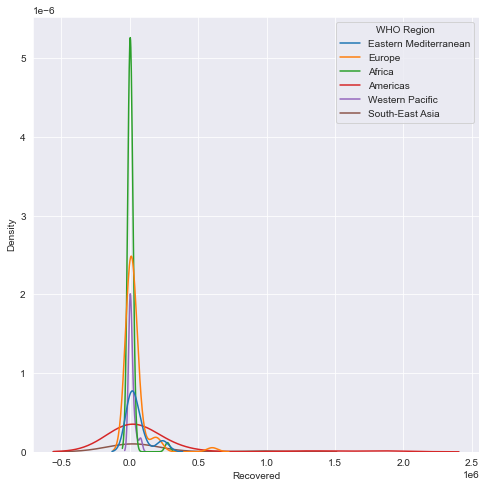

In [162]:
sns.set_style('darkgrid')
plt.figure(figsize=(8,8))
sns.kdeplot(x = 'Recovered',data=country, hue="WHO Region")

##  Kde Plot for Confirmed Cases 

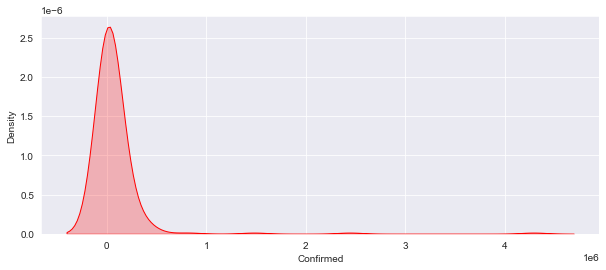

In [118]:

plt.figure(figsize=(10,4))
ax1 = sns.kdeplot(data=country, x="Confirmed",color='r',shade=True)
plt.show(ax1)

## Deaths

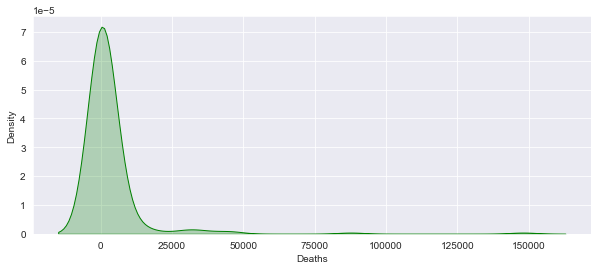

In [176]:
# Deaths
plt.figure(figsize=(10,4))
ax2 = sns.kdeplot(data=country, x="Deaths", color='g',shade=True)
plt.show(ax2)

## Recovered

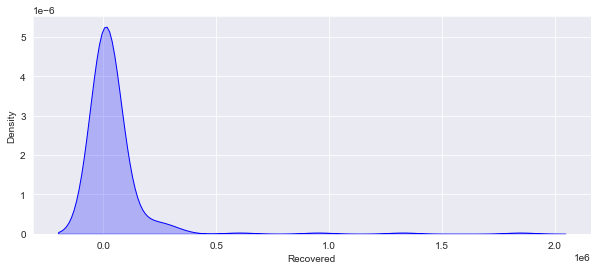

In [177]:
# Recovered
plt.figure(figsize=(10,4))
ax3 = sns.kdeplot(data=country, x="Recovered", color='b',shade=True)
plt.show(ax3)



## Active

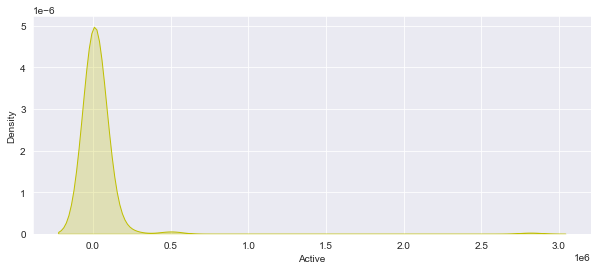

In [168]:
# Active
plt.figure(figsize=(10,4))
ax4 = sns.kdeplot(data=country, x="Active", color='y',shade=True)
plt.show(ax4)

## New Cases

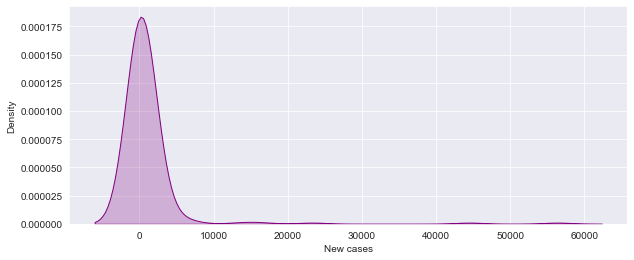

In [122]:
# New Cases
plt.figure(figsize=(10,4))
ax5 = sns.kdeplot(data=country, x="New cases", color='purple',shade=True)
plt.show(ax5)


## New Deaths 

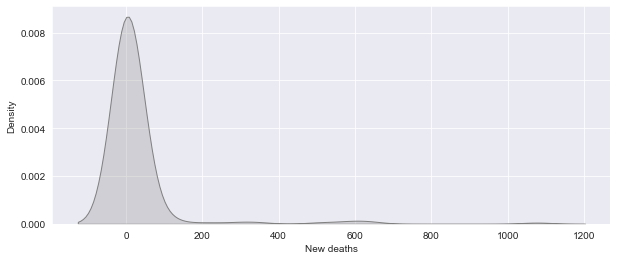

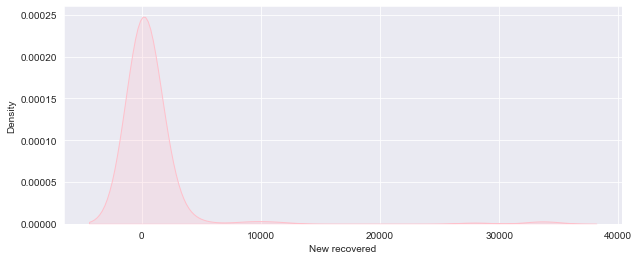

In [123]:
# New Deaths
plt.figure(figsize=(10,4))
ax6 = sns.kdeplot(data=country, x="New deaths", color='gray',shade=True)
plt.show(ax6)

# New Recovered
plt.figure(figsize=(10,4))
ax7 = sns.kdeplot(data=country, x="New recovered", color='pink',shade=True)
plt.show(ax7)

# Pie Plot 

In [169]:
px.pie(world[:20],values='TotalCases',names='Country/Region',title='Top 25 Countries',template="plotly_dark")

__The percentage of the top 25 countries with the most cases is represented in this pie chart. U.S. has almost 1/3 of the total cases among these 25 countries. This pie chart was created using Plotly libraries.__

## Lets Initialise the WHO data_ columns to seperate Columns 

In [136]:
europe = world[world['Continent'] == 'Europe']
asia = world[world['Continent'] == 'Asia']
north_america = world[world['Continent'] == 'North America']
south_america = world[world['Continent'] == 'South America']
australia_oceania = world[world['Continent'] == 'Australia/Oceania']

# For Europe

In [170]:
px.pie(europe[:20], values='TotalCases', names='Country/Region',template="plotly_dark", 
       title='Top 25 Countries/Regions in Europe')

__Russia has over a quarter of the total cases in Europe.__

# North America

In [178]:
px.pie(north_america[:10], values='TotalCases', names='Country/Region',template="plotly_dark",
       title='Top 15 Countries/Regions in North America')

__U.S. has 85% of the total cases in North America.__

# South America

In [172]:
px.pie(south_america, values='TotalCases', names='Country/Region',template="plotly_dark",
       title='Countries/Regions in South America')

__Brazil has the majority of the total cases in South America.__

# Australia/Oceania

In [158]:
px.pie(australia_oceania, values='TotalCases', names='Country/Region',template="plotly_dark", 
       title='Countries/Regions in Australia/Oceania')

__Australia has the most cases. This makes sense as Australia is the largest country/continent in this area.__

# Asia

In [182]:
px.pie(asia[:25], values='TotalCases', names='Country/Region',template="plotly_dark",
       title='Top 25 Countries/Regions in Asia')

__India has the most cases in Asia. This is consisent with the previous geographical maps.__

# Using Plotly's {Bar_Plot}

## TotalRecovered V/S Country/Region

In [183]:
fig = px.bar(world[:50], x = 'Country/Region', y = 'TotalRecovered',color = 'Country/Region',template="plotly_dark")
fig

## TotalDeaths V/S Country/Region

In [155]:
fig2 = px.bar(world[:50], x = 'Country/Region', y = 'TotalDeaths',color = 'Country/Region',template="plotly_dark")
fig2

__The following plots show the amount of confirmed, recovered, and death cases in the WHO Region. Each bar is also divided into larger and smaller sections based on which country has the most cases.__

## WHO Region V/S  Confirmed

In [153]:
fig3 = px.bar(country, x = 'WHO Region', y = 'Confirmed',color = 'WHO Region',template="plotly_dark")
fig3

## WHO Region V/S  Recovered

In [184]:
fig4 = px.bar(country, x = 'WHO Region', y = 'Recovered',color = 'WHO Region',template="plotly_dark")
fig4

# WHO Region V/S Deaths

In [152]:
fig5 = px.bar(country, x = 'WHO Region', y = 'Deaths',color = 'WHO Region',template="plotly_dark")
fig5

# Heat_Plot

<AxesSubplot:>

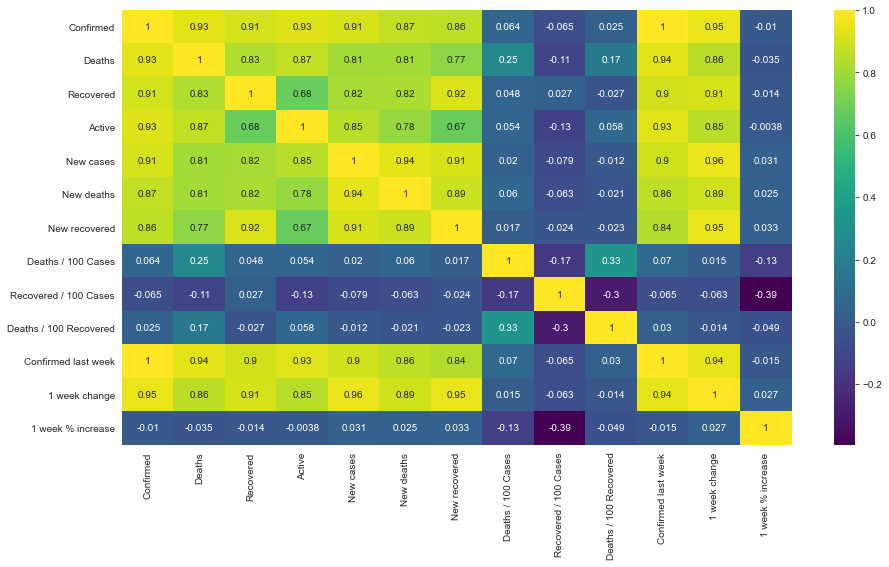

In [148]:
plt.figure(figsize=(15,8))
sns.heatmap(country.corr(),cmap='viridis',annot=True)

__With this heatmap, we can see what features are most correlated with the number of confirmed cases. Most correlated features:__
    
    * Deaths (93%)
    * Active (93%)
    * Recovered (91%)
    * New cases (91%)
    * New deaths (87%)
    * New recovered (86%)
    * Confirmed last week (100%)
    * 1 week change (95%)

<AxesSubplot:>

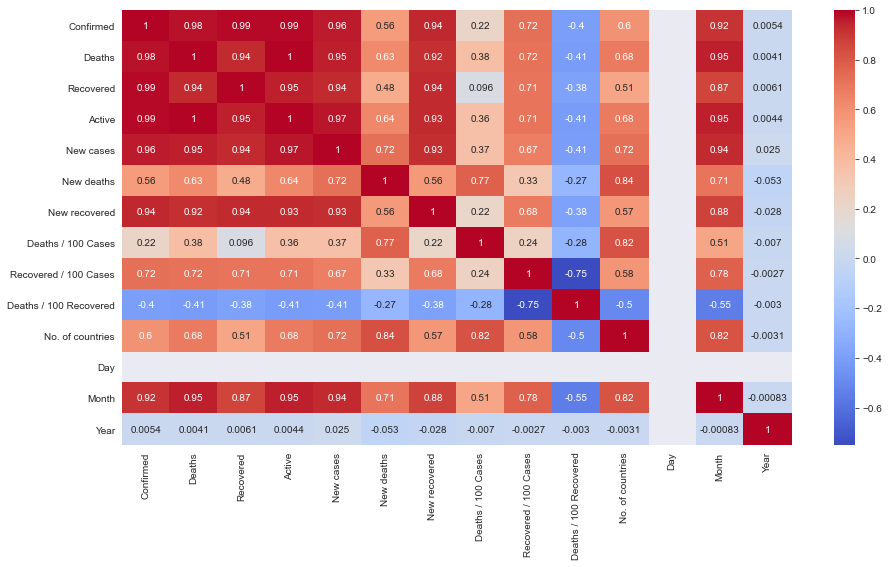

In [149]:
plt.figure(figsize=(15,8))
sns.heatmap(day.corr(),cmap='coolwarm',annot=True)

__Most correlated with confirmed:__

    * Recovered (99%)
    * Active (99%)
    * Deaths (98%)
    * New cases (96%)
    * New recovered (94%)
    * Recoverd/100 Cases (72%)
    * No. of Countries (60%)
    * New deaths (56%)

In [151]:
fig=px.line(day,x="Date",y=["Confirmed","Deaths","Recovered","Active"],title="covid cases w.r.t. date",template="plotly_dark")
fig.show()

# The End